In [4]:
import numpy as np
import pandas as pd
from scipy.io import *
from pylab import *
from scipy.signal import *
import scipy.signal as signal

In [5]:
df_filtered=pd.read_csv('Averaged/Merged_FilteredBands_2_100_500_10.csv')

In [6]:
df_filtered

,Rat,Epoch,Region,Theta,Slow_Gamma,Medium_Gamma,Fast_Gamma,REM_Data,Rem_Data
0,1,1,PFC,"[179.42996697845288, 172.04855382612362, 164.6...","[2.9136983591923106e-05, 6.094227085627811, 11...","[0.0023194894410140986, -6.189366766115221, -1...","[6.540134343813175e-09, -4.892874735717148, -4...",NaN,"[145.55732952442168, 127.16044111963993, 107.0..."
1,1,2,PFC,"[-53.776813325157285, -53.138894752312105, -52...","[-0.0010677884141020574, -3.636151654582216, -...","[-0.00015201848851966902, 7.393718998541514, 1...","[-8.582465409532808e-05, 14.802429168260582, 1...",NaN,"[-57.74313732176249, -36.4199087918546, -21.02..."
2,1,3,PFC,"[57.872067712040725, 57.680901600166194, 57.50...","[0.00014022792241505746, -1.4153017850211151, ...","[0.00031101380488955666, -9.777072632672615, -...","[9.236044097603714e-05, -18.860578333049247, -...",NaN,"[62.14043834812763, 30.518019690989032, 24.920..."
3,1,4,PFC,"[101.30668014964363, 98.15956557731897, 94.987...","[0.0009201007913678325, 9.678706784739088, 18....","[0.0008761780487098762, 7.140636556315515, 12....","[0.00019586342461348858, -10.055956657769253, ...",NaN,"[108.77858284615328, 112.96089086386027, 147.9..."
4,1,5,PFC,"[-192.62894337809644, -194.04073834854157, -19...","[-0.017417144422808176, -0.6818960526964803, -...","[-6.968252932285958e-05, 1.109902582599714, 1....","[-0.00016026705345906312, 28.443166351951216, ...",NaN,"[-156.26461431937844, -122.75596285770703, -12..."
...,...,...,...,...,...,...,...,...,...
331,9,5,HPC,"[196.70631626241624, 200.43950902553007, 204.1...","[0.0024716754066514543, 5.089679609453313, 9.8...","[0.0003672577928625735, -13.456239213207866, -...","[0.0006980080146857744, -2.9293970226644293, -...",NaN,"[159.57226419810885, 154.24595937470332, 164.8..."
332,9,6,HPC,"[-130.9120245773142, -114.80161543215206, -98....","[-0.0019638280964610153, -2.1135322379491512, ...","[-0.00024049684195810467, 3.2016365646921643, ...","[-3.886593995192523e-05, 7.368474368091609, 11...",NaN,"[-106.19856326673451, -78.9531418966323, -75.8..."
333,9,7,HPC,"[-222.86104491778264, -202.05417948976887, -18...","[-0.002800317622181517, 10.301071193300904, 19...","[-0.0012775623434438908, -7.951780044791723, -...","[-0.0016247261473684733, 17.093803358656952, 1...",NaN,"[-180.7895252923394, -147.61799105999685, -91...."
334,9,8,HPC,"[-282.3135138527813, -276.5918866414084, -270....","[-0.004235021284748647, -9.472952478554022, -1...","[-0.0029271906068375026, 16.48571036727049, 30...","[-0.0004132740806275922, -27.200491788048268, ...",NaN,"[-229.018607410218, -236.75039104067622, -232...."


In [15]:

pvalues=pd.DataFrame(columns =['Rat','Region','Theta_SlowGamma', 'Theta_MediumGamma', 'Theta_FastGamma'])
# pvalues['P_values'] = pvalues['P_values'].astype(object)


In [22]:
def pval(data, vlos, vhis, vhas, vhus, region, M=False):        
    p1=0
    p2=0
    p3=0
    if M== False:
        M=len(vlos.values)
    for i in range(M):
        vlo = vlos.values[i]
        vhis = vhis.values[i]
#             vhus = vhus.values[i]
        vhas = vhas.values[i]
        data = data.values[i]
        Vlo = np.array([float(num) for num in vlo.split(',')[1:-1]])
        Vhi = np.array([float(num) for num in vhis.split(',')[1:-1]])
#             Vhu =np.array([float(num) for num in vhus.split(',')[1:-1]])
        Vha = np.array([float(num) for num in vhas.split(',')[1:-1]])
        data = np.array([float(num) for num in data.split(',')[1:-1]])
        phi = angle(signal.hilbert(Vlo))  # Compute phase of low-freq signal
        amp1 = abs(signal.hilbert(Vhi))       # Compute amplitude of high-freq signal
        amp2 = abs(signal.hilbert(Vha))       # Compute amplitude of high-freq signal
#             amp3 = abs(signal.hilbert(Vhu))       # Compute amplitude of high-freq signal
        p_bins = arange(-pi, pi, 0.1)
        a_mean = zeros(size(p_bins)-1)
        a2_mean = zeros(size(p_bins)-1)
#             a3_mean = zeros(size(p_bins)-1)
        p_mean = zeros(size(p_bins)-1)
        for k in range(size(p_bins)-1):     #For each phase bin,
            pL = p_bins[k]                  #... lower phase limit,
            pR = p_bins[k+1]                #... upper phase limit.
            indices=(phi>=pL) & (phi<pR)    #Find phases falling in bin,
            a_mean[k] = mean(amp1[indices])  #... compute mean amplitude
            a2_mean[k] = mean(amp2[indices])  #... compute mean amplitude,
#                 a3_mean[k] = mean(amp3[indices])  #... compute mean amplitude,
            p_mean[k] = mean([pL, pR])      #... save center phase.
        h = max(a_mean)-min(a_mean)
        h2 = max(a2_mean)-min(a2_mean)
#             h3 = max(a3_mean)-min(a3_mean)
        n_surrogates = 1000;                    #Define no. of surrogates.
        hS = zeros(n_surrogates) 
        hS2 = zeros(n_surrogates) 
#             hS3 = zeros(n_surrogates) 
        N=len(data)
        #Vector to hold h results.
        for ns in range(n_surrogates):          #For each surrogate,
            ampS = amp1[randint(0,N,N)]          #Resample amplitude,
            print(dhsampS)
            ampS2 = amp2[randint(0,N,N)]          #Resample amplitude,
#             ampS3 = amp3[randint(0,N,N)]          #Resample amplitude,
            p_bins = arange(-pi, pi, 0.1)       #Define the phase bins
            a_mean = zeros(size(p_bins)-1)      #Vector for average amps.
            a2_mean = zeros(size(p_bins)-1)
#                 a3_mean = zeros(size(p_bins)-1)
            p_mean = zeros(size(p_bins)-1)      #Vector for phase bins.
            for k in range(size(p_bins)-1):
                pL = p_bins[k]                  #... lower phase limit,
                pR = p_bins[k+1]                #... upper phase limit.
                indices=(phi>=pL) & (phi<pR)    #Find phases falling in bin,
                a_mean[k] = mean(ampS[indices]) #... compute mean amplitude,
                a2_mean[k] = mean(ampS2[indices])  #... compute mean amplitude,
#                     a3_mean[k] = mean(ampS3[indices])
                p_mean[k] = mean([pL, pR])      #... save center phase.
            hS[ns] = max(a_mean)-min(a_mean)    # Store surrogate h.
            hS2[ns] = max(a2_mean)-min(a2_mean)    # Store surrogate h.
#                 hS3[ns] = max(a3_mean)-min(a3_mean)    # Store surrogate h.
        # show()
        counts1, _, _ = hist(hS, label='surrogates slow gamma')               # Plot the histogram of hS, and save the bin counts.
        counts2, _, _ = hist(hS2, label='surrogates medium gamma')               # Plot the histogram of hS, and save the bin counts.
#             counts3, _, _ = hist(hS3, label='surrogates fast gamma')               # Plot the histogram of hS, and save the bin counts.
        vlines(h, 0, max(counts1), colors='red', label='h slow gamma', lw=2)  # Plot the observed h,
        vlines(h2, 0, max(counts2), colors='green', label='h medium gamma', lw=2)  # Plot the observed h,
#             vlines(h3, 0, max(counts3), colors='black', label='h fast gamma', lw=2)  # Plot the observed h,
        legend(); 
        savefig('Rat%s_Averaged_100_CFC_%s_nofast'%(rat, region))
        show()
        p1 += sum([s > h for s in hS]) / len(hS)
        p2 += sum([s > h2 for s in hS2]) / len(hS2)
#             p3 += sum([s > h3 for s in hS3]) / len(hS3)
        pvalues = {'Rat':rat,'Region':region,'Theta_SlowGamma':p1/M, 'Theta_MediumGamma':p2/M,'Theta_FastGamma':p3/M}
    return pvalues

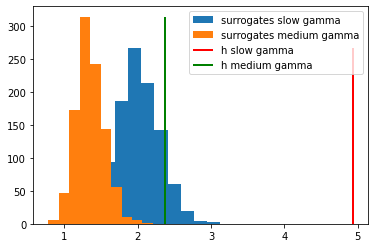

/tmp/ipykernel_5465/1689649815.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)


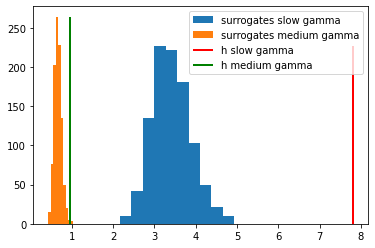

/tmp/ipykernel_5465/1689649815.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)


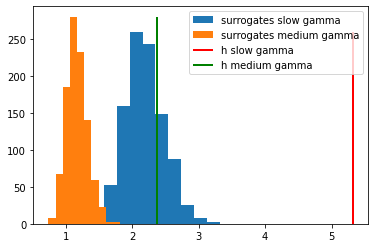

/tmp/ipykernel_5465/1689649815.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)


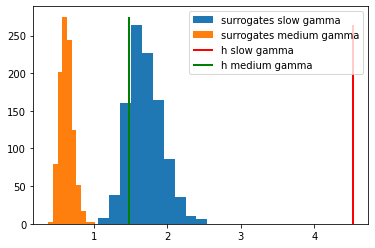

/tmp/ipykernel_5465/1689649815.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)


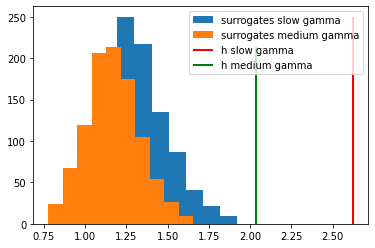

/tmp/ipykernel_5465/1689649815.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)


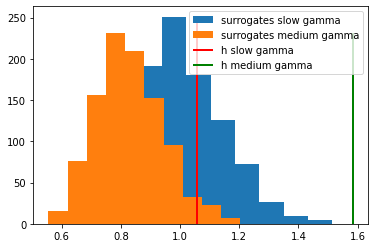

/tmp/ipykernel_5465/1689649815.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)


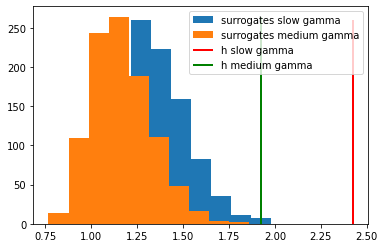

/tmp/ipykernel_5465/1689649815.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)


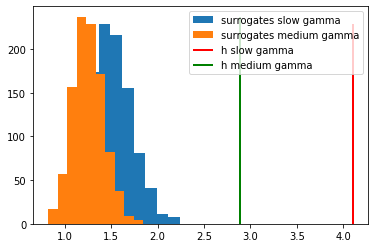

/tmp/ipykernel_5465/1689649815.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)


In [18]:
for rat in range(1, 10):
    if rat!=5:
        vlos = df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='PFC')),'Theta']
        vhis=df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='PFC')),'Slow_Gamma']
        vhas=df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='PFC')),'Medium_Gamma']
        vhus =df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='PFC')),'Fast_Gamma']
        data = df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='PFC')),'Rem_Data']
        pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'PFC',1), ignore_index=True)

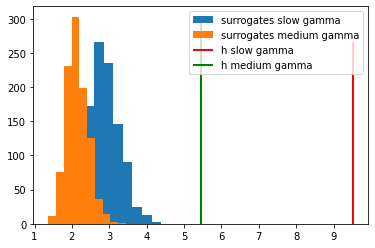

/tmp/ipykernel_5465/4125756161.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)


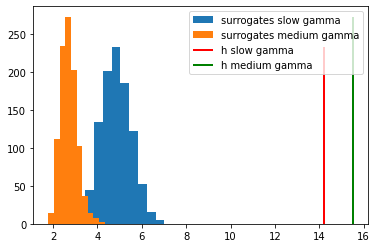

/tmp/ipykernel_5465/4125756161.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)


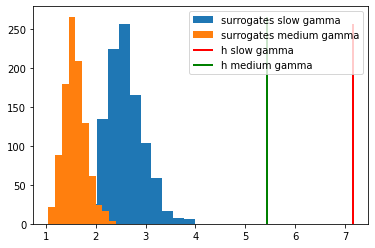

/tmp/ipykernel_5465/4125756161.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)


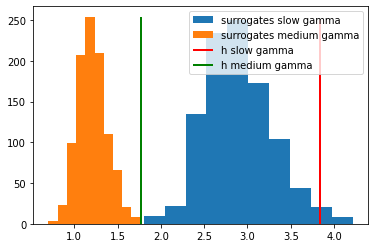

/tmp/ipykernel_5465/4125756161.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)


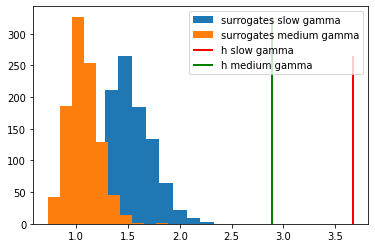

/tmp/ipykernel_5465/4125756161.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)


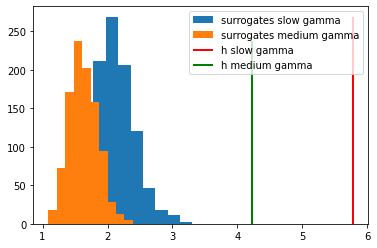

/tmp/ipykernel_5465/4125756161.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)


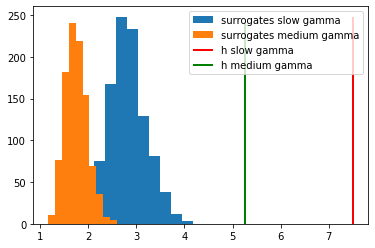

/tmp/ipykernel_5465/4125756161.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)


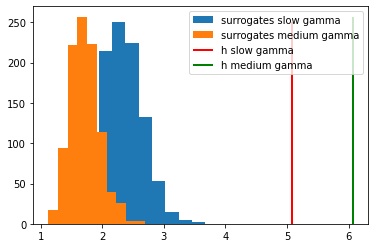

/tmp/ipykernel_5465/4125756161.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)


In [23]:
for rat in range(1, 10):
    if rat!=5:
        vlos = df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='HPC')),'Theta']
        vhis=df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='HPC')),'Slow_Gamma']
        vhas=df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='HPC')),'Medium_Gamma']
        vhus =df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='HPC')),'Fast_Gamma']
        data = df_filtered.loc[((df_filtered.Rat== rat)&(df_filtered.Region =='HPC')),'Rem_Data']
        pvalues=pvalues.append(pval(data, vlos, vhis, vhas, vhus, 'HPC',1), ignore_index=True)

In [24]:
pvalues

,Rat,Region,Theta_SlowGamma,Theta_MediumGamma,Theta_FastGamma
0,1,PFC,0.0,0.0,0.0
1,2,PFC,0.0,0.006,0.0
2,3,PFC,0.0,0.0,0.0
3,4,PFC,0.0,0.0,0.0
4,6,PFC,0.0,0.0,0.0
5,7,PFC,0.327,0.0,0.0
6,8,PFC,0.0,0.0,0.0
7,9,PFC,0.0,0.0,0.0
8,1,PFC,0.0,0.0,0.0
9,2,PFC,0.0,0.0,0.0


In [ ]:
p_bins = arange(-pi, pi, 0.1)
a_mean = zeros(size(p_bins)-1)
p_mean = zeros(size(p_bins)-1)
for k in range(size(p_bins)-1):     #For each phase bin,
    pL = p_bins[k]                  #... lower phase limit,
    pR = p_bins[k+1]                #... upper phase limit.
    indices=(phi>=pL) & (phi<pR)    #Find phases falling in bin,
    a_mean[k] = mean(amp1[indices])  #... compute mean amplitude,
    p_mean[k] = mean([pL, pR])      #... save center phase.
plot(p_mean, a_mean)                #Plot the phase versus amplitude,
ylabel('High-frequency amplitude')  #... with axes labeled.
xlabel('Low-frequency phase');


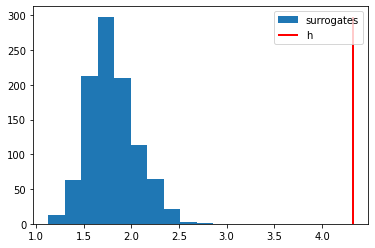

0.0


In [ ]:
h = max(a_mean)-min(a_mean)
n_surrogates = 1000;                    #Define no. of surrogates.
hS = zeros(n_surrogates) 
N=len(data)
#Vector to hold h results.
for ns in range(n_surrogates):          #For each surrogate,
    ampS = amp1[randint(0,N,N)]          #Resample amplitude,
    p_bins = arange(-pi, pi, 0.1)       #Define the phase bins
    a_mean = zeros(size(p_bins)-1)      #Vector for average amps.
    p_mean = zeros(size(p_bins)-1)      #Vector for phase bins.
    for k in range(size(p_bins)-1):
        pL = p_bins[k]                  #... lower phase limit,
        pR = p_bins[k+1]                #... upper phase limit.
        indices=(phi>=pL) & (phi<pR)    #Find phases falling in bin,
        a_mean[k] = mean(ampS[indices]) #... compute mean amplitude,
        p_mean[k] = mean([pL, pR])      #... save center phase.
    hS[ns] = max(a_mean)-min(a_mean)    # Store surrogate h.
show()
counts, _, _ = hist(hS, label='surrogates')               # Plot the histogram of hS, and save the bin counts.
vlines(h, 0, max(counts), colors='red', label='h', lw=2)  # Plot the observed h,
legend(); 
show()
p = sum([s > h for s in hS]) / len(hS)
print(p)

In [8]:
pvalues = pd.read_csv('Data_Averaged_CFC_Random_Average_standard_5.csv')
print([row for row in pvalues.P_values])
# pvalues.
# pd.series
# {'Theta_SlowGamma','Theta_MediumGamma'}


['[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.31239999999999996, 0.0002, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0012000000000000001]', '[0.0, 0.0, 0.0]', '[0.0, 0.0, 0.0]']


In [25]:
pvalues.to_csv('Data_Averaged_CFC_Random_Average.csv')